In [1]:
#auto reload 
%load_ext autoreload
%autoreload 2

In [2]:
from snake_env import SnakeEnv
import mediapy as media
import pygame
import numpy as np

pygame 2.4.0 (SDL 2.26.4, Python 3.7.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


""

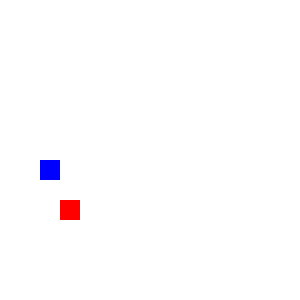

In [3]:
snakie = SnakeEnv({})
snakie.render_mode = "rgb_array"
snakie.reset()
media.show_image(snakie.render())

In [4]:
n_exp = 1
expert_exp = {"reward": [], "action": [], "observation": [], "terminal": [], "next_observation": []}
snakie = SnakeEnv({"render_mode": "human"})
pygame.time.wait(1000)
for experience in range(n_exp):
    #run forever and take actions from keyboard and collect data about the reward

    expert_exp["observation"].append(snakie.reset()[0])
    done = False
    action = 0 
    while not done:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    action = 2
                elif event.key == pygame.K_RIGHT:
                    action = 3
                elif event.key == pygame.K_UP:
                    action = 0
                elif event.key == pygame.K_DOWN:
                    action = 1

        probs = [0,0,0,0]
        probs[action] = 1
        obs,reward,done,_= snakie.step(probs)
        expert_exp["reward"].append(reward)
        expert_exp["action"].append(probs)
        expert_exp["observation"].append(obs)
        expert_exp["terminal"].append(done)
        expert_exp["next_observation"].append(obs)
        snakie.render("human")
        pygame.time.wait(10)
    expert_exp["observation"] = expert_exp["observation"][:-1]
pygame.quit()

ValueError: not enough values to unpack (expected 5, got 4)

: 

In [ ]:
print(len(expert_exp["next_observation"]))
print(len(expert_exp["observation"]))

160
160


In [ ]:
import torch

In [ ]:
observations =[obs[0].tolist() if isinstance(obs, tuple) else obs.tolist() for obs in expert_exp["observation"]]

In [ ]:
new_observation = [obs[0].tolist() if isinstance(obs, tuple) else obs.tolist() for obs in expert_exp["next_observation"]]

In [ ]:
actions = expert_exp["action"]

In [ ]:
dones = expert_exp["terminal"]

In [ ]:
rewards = expert_exp["reward"]

In [ ]:
tobejsoned = {"observations": observations, "actions": actions, "terminals": dones, "next_observations": new_observation , "rewards": rewards}

In [ ]:
import json
with open("expert_data.json", "w") as f:
    json.dump(tobejsoned, f)